# Tutorial for me

## Download from geo

In [20]:
# one-off in shell (or ! in Jupyter):
!wget -O 1st_PB1.bed.gz \
  "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE49nnn/GSE49828/suppl/GSE49828_RRBS_1st_PB1_methylation_calling.bed.txt.gz"



--2025-06-17 12:59:16--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE49nnn/GSE49828/suppl/GSE49828_RRBS_1st_PB1_methylation_calling.bed.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.13, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122381185 (117M) [application/x-gzip]
Saving to: ‘1st_PB1.bed.gz’

1st_PB1.bed.gz      100%[===================>] 116.71M  6.95MB/s    in 32s     

2025-06-17 12:59:54 (3.60 MB/s) - ‘1st_PB1.bed.gz’ saved [122381185/122381185]



In [21]:
!gzip -l 1st_PB1.bed.gz      # peek at size / compression ratio

         compressed        uncompressed  ratio uncompressed_name
          122381185           799198042  84.7% 1st_PB1.bed


In [22]:
!zcat 1st_PB1.bed.gz | head # peek at the first few lines

#Chr	Pos	Ref	Chain	Total	Met	UnMet	MetRate	Ref_context	Type
chr7	31498	g	-	8	0	8	0	CGG	CpG
chr7	31499	g	-	8	0	8	0	CCG	CHG
chr7	31500	g	-	8	0	8	0	CCC	CHH
chr7	31502	g	-	8	1	7	0.125	CGC	CpG
chr7	31504	g	-	8	1	7	0.125	CGC	CpG
chr7	31505	g	-	8	0	8	0	CCG	CHG
chr7	31507	g	-	8	0	8	0	CAC	CHH
chr7	31508	g	-	8	0	8	0	CCA	CHH
chr7	31514	g	-	8	0	8	0	CGT	CpG

gzip: stdout: Broken pipe


## Work in pandas

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
cols = ["chr","pos","ref", "chain", "total","met","unmet","rate","ctx","type"]
dtypes = dict(chr="category", pos="int32", ref="category", chain="category",
              total="int16", met="int16", unmet="int16",
              rate="float32", ctx="category", type="category")

df = pd.read_table("1st_PB1.bed.gz", sep=r"\s+", header=0,
                   names=cols, usecols=cols, dtype=dtypes)
df

,chr,pos,ref,chain,total,met,unmet,rate,ctx,type
0,chr7,31498,g,-,8,0,8,0.000,CGG,CpG
1,chr7,31499,g,-,8,0,8,0.000,CCG,CHG
2,chr7,31500,g,-,8,0,8,0.000,CCC,CHH
3,chr7,31502,g,-,8,1,7,0.125,CGC,CpG
4,chr7,31504,g,-,8,1,7,0.125,CGC,CpG
...,...,...,...,...,...,...,...,...,...,...
22193267,chr5,180874768,g,-,2,0,2,0.000,CCA,CHH
22193268,chr5,180874770,g,-,2,2,0,1.000,CAC,CHH
22193269,chr5,180874772,g,-,2,2,0,1.000,CAC,CHH
22193270,chr5,180874774,g,-,2,0,2,0.000,CTC,CHH


### Keep high quality CpG sites

In [25]:
df = df[(df.type=="CpG") & (df.total>=5)].copy()
df

,chr,pos,ref,chain,total,met,unmet,rate,ctx,type
0,chr7,31498,g,-,8,0,8,0.000000,CGG,CpG
3,chr7,31502,g,-,8,1,7,0.125000,CGC,CpG
4,chr7,31504,g,-,8,1,7,0.125000,CGC,CpG
8,chr7,31514,g,-,8,0,8,0.000000,CGT,CpG
16,chr7,31542,g,-,9,0,9,0.000000,CGG,CpG
...,...,...,...,...,...,...,...,...,...,...
22193124,chr5,180864582,G,-,6,4,2,0.666667,CGG,CpG
22193132,chr5,180864612,G,-,5,4,1,0.800000,CGC,CpG
22193133,chr5,180864615,G,-,7,7,0,1.000000,CGG,CpG
22193139,chr5,180864639,G,-,5,5,0,1.000000,CGT,CpG


In [26]:
# 1) canonical CpG coordinate  (minus-strand Cs are +1 bp)
df["cpg_pos"] = np.where(df.chain == "-", df.pos - 1, df.pos)
df

,chr,pos,ref,chain,total,met,unmet,rate,ctx,type,cpg_pos
0,chr7,31498,g,-,8,0,8,0.000000,CGG,CpG,31497
3,chr7,31502,g,-,8,1,7,0.125000,CGC,CpG,31501
4,chr7,31504,g,-,8,1,7,0.125000,CGC,CpG,31503
8,chr7,31514,g,-,8,0,8,0.000000,CGT,CpG,31513
16,chr7,31542,g,-,9,0,9,0.000000,CGG,CpG,31541
...,...,...,...,...,...,...,...,...,...,...,...
22193124,chr5,180864582,G,-,6,4,2,0.666667,CGG,CpG,180864581
22193132,chr5,180864612,G,-,5,4,1,0.800000,CGC,CpG,180864611
22193133,chr5,180864615,G,-,7,7,0,1.000000,CGG,CpG,180864614
22193139,chr5,180864639,G,-,5,5,0,1.000000,CGT,CpG,180864638


In [27]:
# 2) collapse + and – strands
collapsed = (
    df.groupby(["chr", "cpg_pos"], observed=True, as_index=False)
      .agg(met   =("met",   "sum"),
           total =("total", "sum"))
)
collapsed["rate"] = collapsed.met / collapsed.total
collapsed

,chr,cpg_pos,met,total,rate
0,chr7,31497,0,8,0.000000
1,chr7,31501,1,8,0.125000
2,chr7,31503,1,8,0.125000
3,chr7,31513,0,8,0.000000
4,chr7,31541,0,9,0.000000
...,...,...,...,...,...
1689930,chr5,180864581,4,6,0.666667
1689931,chr5,180864611,4,5,0.800000
1689932,chr5,180864614,7,7,1.000000
1689933,chr5,180864638,5,5,1.000000


## Plot distribution of CpG sites

Text(0.5, 1.0, 'Distribution of CpG methylation (PB1)')

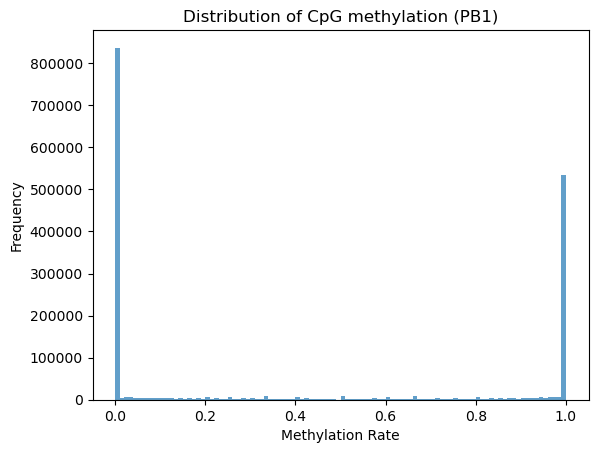

In [28]:
collapsed["rate"].plot.hist(bins=100, alpha=0.7)
plt.xlabel("Methylation Rate")
plt.title("Distribution of CpG methylation (PB1)")

## Sanity check

In [30]:
df_minus = df[df["chain"] == "-"]
shifted = (df_minus["cpg_pos"] == df_minus["pos"] - 1).all()
print("Reverse strand CpGs correctly shifted:", shifted)


Reverse strand CpGs correctly shifted: True


In [31]:
df_plus = df[df["chain"] == "+"]
not_shifted = (df_plus["cpg_pos"] == df_plus["pos"]).all()
print("Forward strand CpGs correctly retained:", not_shifted)


Forward strand CpGs correctly retained: True


In [32]:
site_counts = df.groupby(["chr", "cpg_pos"])["chain"].nunique()
both_strands = site_counts[site_counts == 2]
print(f"Found {len(both_strands)} CpG sites with both + and - strand coverage.")


/tmp/ipykernel_706224/3357951962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  site_counts = df.groupby(["chr", "cpg_pos"])["chain"].nunique()


Found 574516 CpG sites with both + and - strand coverage.


In [33]:
example_sites = both_strands.sample(5).index
example_rows = df.set_index(["chr", "cpg_pos"]).loc[example_sites].sort_index()
print(example_rows[["pos", "chain"]])


                       pos chain
chr   cpg_pos                   
chr7  1538012      1538012     +
      1538012      1538013     -
chr1  16342155    16342155     +
      16342155    16342156     -
chr3  46037290    46037290     +
      46037290    46037291     -
chr4  48294128    48294128     +
      48294128    48294129     -
chr13 113107080  113107080     +
      113107080  113107081     -
